# P3 

Due: Sun. 10/25, 11:59pm

This projects gives you experience with getting data from APIs. 

First, let's get the imports set up

In [ ]:
import pandas as pd 
import requests 
import re 
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import json
from bs4 import BeautifulSoup
import tweepy

### Q1 

Follow these instructions to get your keys:

1. [Create a Twitter account](https://twitter.com).  You can use an existing account if you have one.
2. Under account settings, add your phone number to the account.
3. [Create a Twitter developer account](https://dev.twitter.com/resources/signup).  Attach it to your Twitter account.  You should indicate that you are a student and this is to be used for educational purposes (you can mention the class name), that you are not downloading or processing data in bulk.   
4. Once you're logged into your developer account, [create an application for this assignment](https://apps.twitter.com/app/new).  You can call it whatever you want, and you can write any URL when it asks for a web site.
5. On the page for that application, find your Consumer Key and Consumer Secret.
6. On the same page, create an Access Token.  Record the resulting Access Token and Access Token Secret.
7. Edit the file `keys.json` and replace the placeholders with your keys.  **Do not turn in this file.**

#### Method 1: 
Copy and paste the key information (never upload your key information to the Drive). 


In [ ]:
# Method 1 - Get Key Info 
from getpass import getpass
keys = {}
keys["consumer_key"] = getpass("Enter Twitter Consumer Key:    ")
keys["consumer_secret"] = getpass("Enter Twitter Consumer Secret: ")
keys["access_token"] = getpass("Enter Twitter Access Token:    ")
keys["access_token_secret"] = getpass("Enter Twitter Access Token Secret: ")


#### Method 2 

Load `keys.json` to Colab directory (file is destroyed when sevice is disconnected).  This method relys on Google's security for safely storing and protecting your data. 

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving keys.json to keys.json


In [ ]:
with open("keys.json") as f:
    keys = json.load(f)

## Example - Get some Tweets

In the example below, load some tweets by `@packers`.  Run it, inspect the output, and read the code. 

In [ ]:
ds_tweets_save_path = "Packers_recent_tweets.pkl"
from pathlib import Path 

# Guarding against attempts to download the data multiple times: 
if not Path(ds_tweets_save_path).is_file():
    # use keys loaded in above by Method 1 or 2 

    # Authenticating: 
    auth = tweepy.OAuthHandler(keys["consumer_key"], keys["consumer_secret"])
    auth.set_access_token(keys["access_token"], keys["access_token_secret"])
    api = tweepy.API(auth)

    # Getting as many recent tweets by @packers as Twitter will let us have 
    example_tweets = list(tweepy.Cursor(api.user_timeline, id="packers").items())

    # Saving the tweets to a file as "pickled" objects: 
    with open(ds_tweets_save_path, "wb") as f:
        import pickle 
        pickle.dump(example_tweets, f)

# Re-loading the results
with open(ds_tweets_save_path, "rb") as f:
    import pickle 
    example_tweets = pickle.load(f)


Inspect several of the tweet objects, see what form they take what information is stored, where it is stored. 

In [ ]:
# Looking at one tweet object, which has type Status: 
example_tweets[0]

Status(_json={'created_at': 'Mon Oct 26 00:58:42 +0000 2020', 'id': 1320530259863916544, 'id_str': '1320530259863916544', 'text': '"That\'s a credit to those guys. There were a lot of guys we knew this week that were gonna get a chance to play."… https://t.co/8FRQYvoN6C', 'truncated': True, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/8FRQYvoN6C', 'expanded_url': 'https://twitter.com/i/web/status/1320530259863916544', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [115, 138]}]}, 'source': '<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 35865630, 'id_str': '35865630', 'name': 'Green Bay Packers', 'screen_name': 'packers', 'location': 'Green Bay, WI', 'description': 'The official Twitter account of the 13-time World Champion Gre

Understanding the tweet structure is hard, especially when the information is all printed in a single line.  Let's try another way to make this a bit easier to read. 

In [ ]:
import pprint
pprint.pprint(vars(example_tweets[0]))

{'_json': {'contributors': None,
           'coordinates': None,
           'created_at': 'Mon Oct 26 00:58:42 +0000 2020',
           'entities': {'hashtags': [],
                        'symbols': [],
                        'urls': [{'display_url': 'twitter.com/i/web/status/1…',
                                  'expanded_url': 'https://twitter.com/i/web/status/1320530259863916544',
                                  'indices': [115, 138],
                                  'url': 'https://t.co/8FRQYvoN6C'}],
                        'user_mentions': []},
           'favorite_count': 211,
           'favorited': False,
           'geo': None,
           'id': 1320530259863916544,
           'id_str': '1320530259863916544',
           'in_reply_to_screen_name': None,
           'in_reply_to_status_id': None,
           'in_reply_to_status_id_str': None,
           'in_reply_to_user_id': None,
           'in_reply_to_user_id_str': None,
           'is_quote_status': False,
           'la

## Q2 - (15 pts)

Write code to download all the recent tweets by the LA Dodgers (@Dodgers).  Follow the example code above.  Write your code in the form of functions matching the documentation provided below.  **Once you've written your function**, run the subsequent cell to download the tweets. 

In [ ]:
def download_recent_tweets_by_user(user_account_name, keys): 
    """Downloads tweets by one Twitter user. 

    Input Args: 
        user_account_name (str): The name of hte Twitter account whose tweets
          will be downloaded. 
        keys (dict): A Python dictionary with Twitter authentication keys 
          (strings), like this: 
          { 
              "consumer_key": "<your Consumer Key here>",
              "consumer_secret":  "<your Consumer Secret here>",
              "access_token": "<your Access Token here>",
              "access_token_secret": "<your Access Token Secret here>"
          }
        
    Returns: 
        list of Status objects, each representing one tweet.
    """
    ### BEGIN SOLUTION 
    

    # Authenticating: 
    auth = tweepy.OAuthHandler(keys["consumer_key"], keys["consumer_secret"])
    auth.set_access_token(keys["access_token"], keys["access_token_secret"])
    api = tweepy.API(auth)

    # Getting as many recent tweets by @packers as Twitter will let us have 
    example_tweets = list(tweepy.Cursor(api.user_timeline, id=user_account_name).items())
    
    return example_tweets
    ### END SOLUTION 

In [ ]:
#saving a list of tweets in file
def save_tweets(tweets, path):
    """Saves a list of tweets to a file in the local filesystem. 

    This function makes no guarantee about the format of the saved
    tweets, **except** that calling load_tweets(path) after
    save_tweets(tweets, path) will produce the same list of tweets
    and that only the file at the given path is used to store the
    tweets.  (That means you can implement this function however
    you want, as long as saving and loading works!)

    Input Args: 
      tweets (list): A list of tweet objects (of type Status) to be saved. 
      path (str): The place where the tweets will be saved. 

    Returns: 
       None.
    """
    ### BEGIN SOLUTION
    with open(path, "wb") as f:
        import pickle 
        pickle.dump(tweets, f)    
    
    ### END SOLUTION 

In [ ]:
#loading tweets into file
def load_tweets(path): 
    """Loads tweets that have previously been saved. 

    Calling load_tweets(path) after save_tweets(tweets, path) will produce 
    the same list of tweets. 

    Input Args: 
      path (str): The place where the tweets were to be saved. 

    Returns: 
      list: A list of tweet objects (of type Status), each representing one tweet 
    """
    ### BEGIN SOLUTION
    with open(path, "rb") as f:
      import pickle 
      example_tweets = pickle.load(f)
    return example_tweets     
    
    
    ### END SOLUTION 

In [ ]:
# When you are done writing the functions above, run this cell to load 
#  @Dodgers tweets.  Note the function "get_tweets_with_cache".  You may find it
#  useful later. 

def get_tweets_with_cache(user_account_name, keys): 
    """Get recent tweets from one user, loading from a disk cache if available.
    
    The first time you call this function, it will download tweets by
    a user.  Subsequent calls will not re-download the tweets; instead
    they'll load the tweets from a save file in your local filesystem.
    All this is done using the functions you defined in the previous cell.
    This has benefits and drawbacks that often appear when you cache data:
    
    +: Using this function will prevent extraneous usage of the Twitter API.
    +: You will get your data much faster after the first time it's called.
    -: If you really want to re-download the tweets (say, to get newer ones,
       or because you screwed up something in the previous cell and your
       tweets aren't what you wanted), you'll have to find the save file
       (which will look like <something>_recent_tweets.pkl) and delete it.
    
    Args:
        user_account_name (str): The Twitter handle of a user, without the @.
        keys (dict): A Python dictionary with Twitter authentication keys 
    """
    save_path = "{}_recent_tweets.pkl".format(user_account_name)
    from pathlib import Path 
    if not Path(save_path).is_file():
        tweets = download_recent_tweets_by_user(user_account_name, keys)
        save_tweets(tweets, save_path)
    return load_tweets(save_path)


In [ ]:
dodgers_tweets = get_tweets_with_cache("Dodgers", keys)

In [ ]:
# If everything is working properly you can look at the tweets 
dodgers_tweets[0]

Status(_json={'created_at': 'Mon Oct 26 00:45:05 +0000 2020', 'id': 1320526833100582912, 'id_str': '1320526833100582912', 'text': 'WALK IT OUT, JOC. https://t.co/bczBbgqEhC', 'truncated': False, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 1320526652133109760, 'id_str': '1320526652133109760', 'indices': [18, 41], 'media_url': 'http://pbs.twimg.com/media/ElN0F--VcAATLtw.jpg', 'media_url_https': 'https://pbs.twimg.com/media/ElN0F--VcAATLtw.jpg', 'url': 'https://t.co/bczBbgqEhC', 'display_url': 'pic.twitter.com/bczBbgqEhC', 'expanded_url': 'https://twitter.com/Dodgers/status/1320526833100582912/video/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 1200, 'h': 675, 'resize': 'fit'}, 'small': {'w': 680, 'h': 383, 'resize': 'fit'}, 'large': {'w': 1280, 'h': 720, 'resize': 'fit'}}}]}, 'extended_entities': {'media': [{'id': 1320526652133109760, 'id_str': '1320526652133109760', 'indices': [18, 41], '

In [ ]:
pprint.pprint(vars(dodgers_tweets[0]))

{'_json': {'contributors': None,
           'coordinates': None,
           'created_at': 'Mon Oct 26 00:45:05 +0000 2020',
           'entities': {'hashtags': [],
                        'media': [{'display_url': 'pic.twitter.com/bczBbgqEhC',
                                   'expanded_url': 'https://twitter.com/Dodgers/status/1320526833100582912/video/1',
                                   'id': 1320526652133109760,
                                   'id_str': '1320526652133109760',
                                   'indices': [18, 41],
                                   'media_url': 'http://pbs.twimg.com/media/ElN0F--VcAATLtw.jpg',
                                   'media_url_https': 'https://pbs.twimg.com/media/ElN0F--VcAATLtw.jpg',
                                   'sizes': {'large': {'h': 720,
                                                       'resize': 'fit',
                                                       'w': 1280},
                                             '

## Exploring the dataset 

Twitter gives us a lot of information about each tweet, not just the tweet itself.  You can read the full documentation [here](https://dev.twitter.com/overview/api/tweets).  Look at the one tweet aboe to get a sense of the information we have available. 



### Q3 - (15 pts) 

Which fields contain: 

1. the actual text of a tweet, 
2. the time when the tweet was posted, 
3. the source (device and app) from which the tweet was posted, 
4. the number of times the tweet was favorited, 
5. the number of times a tweet is retweeted?

To answer the question, write functions that extract each field from a tweet.  Each function should take a single tweet (Status object) as its argument. 

In [ ]:
#function to extract text  from json
def extract_text(tweet):
    t=[]
    for x in tweet:
        x=x.text
        t.append(x)
    
    return(t)   

#function to extract time when tweet was created  from json
def extract_time(tweet): 
    # BEGIN SOLUTION 
    ti=[]
    for y in tweet:
      y=y.created_at
      ti.append(y)
    return(ti)   
    #END SOLUTION

#function to extract source  from json
def extract_source(tweet):
    # BEGIN SOLUTION
    s=[] 
    for x in tweet:
      x=x.source
      s.append(x)
    return(s)  
    #END SOLUTION

#function to extract number of tweet that was favorited  from json
def extract_fav_num(tweet):
    # BEGIN SOLUTION
    fav_num=[] 
    for x in tweet:
      x=x.favorite_count
      fav_num.append(x)
    return(fav_num)  
    #END SOLUTION

#function to extract number of retweet   from json   
def extract_retweet_num(tweet):
    # BEGIN SOLUTION
    retweet_num=[] 
    for x in tweet:
      x=x.favorite_count
      retweet_num.append(x)
    return(retweet_num)  
    #END SOLUTION

### Q4 - (10 pts)

Write a function called `make_dataframe`.  It should take as its argument a list of tweets like `dodgers_tweets` and return a `pandas` DataFrame.  The DataFrame should contain columns for all the fields in question 3.  The column names should be `text`, `time`, `source`, `favNum`, `retweetNum`. 

In [ ]:
def make_dataframe(tweets): 
    """Make a DataFrame from a list of tweets, with 5 requested fields. 

    Input Args: 
      tweets (list): a list of tweets, each one a Status object 

    Returns: 
      DataFrame: a pandas DataFrame containing one row for each element 
        of tweets and one column for each relevant field. 
    """
    ### BEGIN SOLUTION 
    #making dataframe of dodlers tweet
    df =pd.DataFrame({'text':extract_text(tweets), 'Time':extract_time(tweets), 'Source':extract_source(tweets),'favNum':extract_fav_num(tweets),'retweetNum':extract_retweet_num(tweets)})
    
    
    return df 
    ### END SOLUTION

In [ ]:
#assisning name to dataset
dodgers_df = make_dataframe(dodgers_tweets)
dodgers_df.head(2)

,text,Time,Source,favNum,retweetNum
0,"WALK IT OUT, JOC. https://t.co/bczBbgqEhC",2020-10-26 00:45:05,Twitter Media Studio,6861,6861
1,Attack early. https://t.co/C7neNEk88z,2020-10-26 00:29:20,Twitter Media Studio,4486,4486


### Q5 - (10 pts) 

Create a plot showing how many tweets came from each kind of source. 

In [ ]:
### BEGIN SOLUTION
data=dodgers_df.groupby(['Source'])['retweetNum'].sum().reset_index()
data
### END SOLUTION 

,Source,retweetNum
0,Twitter Media Studio,3961386
1,Twitter Web App,524977
2,Twitter for Advertisers (legacy),32688
3,Twitter for iPhone,1513370


Text(0.5, 1.0, 'Source vs retweetNum')

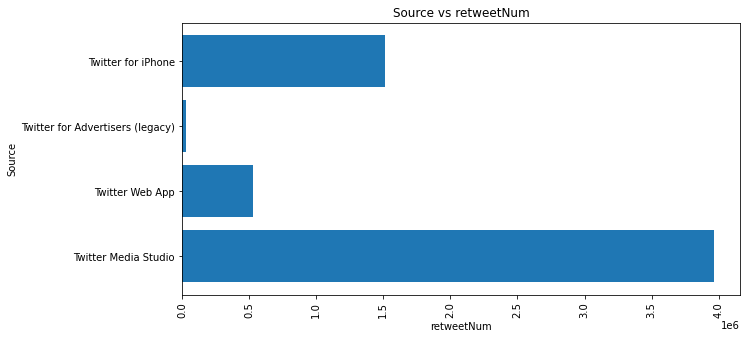

In [ ]:
fig = plt.figure(figsize = (10, 5)) 
plt.barh(data['Source'], data['retweetNum'])
plt.xlabel("retweetNum")
plt.xticks(rotation=90) 
plt.ylabel("Source") 
plt.title("Source vs retweetNum") 

## Examining Text

The following questions comes from [https://www.earthdatascience.org/courses/use-data-open-source-python/intro-to-apis/calculate-tweet-word-frequencies-in-python/](https://www.earthdatascience.org/courses/use-data-open-source-python/intro-to-apis/calculate-tweet-word-frequencies-in-python/)

Here is a function that removes the URLs (links) and emojis from the tweet text. By running the code that follows this function you should have then "cleanish" text.  *Note, it may not eliminate all emojis*

In [ ]:
import re 

In [ ]:
def remove_url(txt): 
    """Replace URLs found in a text string with nothing 
    (i.e. it will remove the URL from the string).
    Also, replaces the emoji with nothing. 

    Parameters
    ----------
    txt : string
        A text string that you want to parse and remove urls.

    Returns
    -------
    The same txt string with url's removed.
    """
    txt2 = re.sub('http[s]?://\S+', '', txt)
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    txt2 = re.sub(emoji_pattern, '', txt2)
    return txt2


In [ ]:
dodTweets = [tweet.text for tweet in dodgers_tweets]
dodTweets_no_urls = [remove_url(tweet) for tweet in dodTweets]
dodTweets_no_urls[0:4]

['WALK IT OUT, JOC. ',
 'Attack early. ',
 '#ITFDB ',
 'RT @DodgerInsider: "Once you leave the locker room last night, it was over with."\n\nThe Dodgers say the shock of Game 4\'s finish is behind t…']

### Q6 - (10 pts) 

Write code that will take your list of tweet text `dodTweets_no_urls` and creates a list of lists containing the lower case words for each tweet. 

*Hint:* you may want to think about performing the operations on a single tweet text `dodTweets_no_urls[0]` - convert it to all lower case, break it into individual words.  Think about String methods [https://docs.python.org/3.7/library/stdtypes.html#string-methods](https://docs.python.org/3.7/library/stdtypes.html#string-methods)

*Hint:* Once you get the list of words from a single tweet text, collect all the tweet's texts in another list. 

```
[['test', 
  'string', 
  'text'],
 ['hello', 
  'world']]
```

In [ ]:
words_in_tweets = ...
words_in_tweets[:3]

In [ ]:
word_list=[]
for y in dodTweets_no_urls:
    
    words=y.split(' ')
    words=[x.lower().rstrip() for x in words]
    word_list.append(words)
print(word_list)    

[['walk', 'it', 'out,', 'joc.', ''], ['attack', 'early.', ''], ['#itfdb', ''], ['rt', '@dodgerinsider:', '"once', 'you', 'leave', 'the', 'locker', 'room', 'last', 'night,', 'it', 'was', 'over', 'with."\n\nthe', 'dodgers', 'say', 'the', 'shock', 'of', 'game', "4's", 'finish', 'is', 'behind', 't…'], ["tonight's", 'lineup', 'at', 'rays:\n\n#worldseries', '|', '#latogether', ''], ['rt', '@davidprice24:', 'the', 'tough', 'times', 'or', 'lows', 'of', 'baseball,', 'sports,', 'and', 'life', 'is', 'what', 'makes', 'the', 'highs', 'so', 'enjoyable.', 'flush', 'it', 'and', 'move', 'forward.', '#g…'], ['final:', 'rays', '8,', '#dodgers', '7'], [''], ['you', 'like', 'that?!', ''], ['@richieisevol', ''], ['@lxzz14', ''], ['@grooovyb', '🤝'], ['@hustiababy_', ''], ['kiké', 'x', '100pre.', ''], ['rt', '@dodgerinsider:', "urías'", 'previous', 'playoff', 'career', 'high', 'in', 'strikeouts', 'was', 'six.', 'he', 'departs', 'after', 'his', 'ninth', 'tonight.', '\n\nfinal', 'line:', '4.2', 'ip,', '4', 'h…'

### Q7 - (10 pts) 

Write code to take your list of lists of words and count the number of times each word appears.

You may want to look at using `itertools` to flatten the list. Also, look at the built-in Python library `collections`, which helps create a special type of a Python dictonary. The `collection.Counter` object has a useful built-in method `most_common` that will return the most commonly used words and the number of times that they are used.

In [ ]:
#using collection.Counter counting the  words count 
import itertools 
import collections
l1 = []
for i in range(len(word_list)):
  for j in word_list[i]:
    l1.append(j)
l2=collections.Counter(l1).most_common()
l2.pop(0)
print(l2)

[('the', 937), ('rt', 643), ('to', 371), ('a', 366), ('and', 346), ('in', 314), ('of', 310), ('@dodgerinsider:', 248), ('for', 244), ('on', 211), ('with', 200), ('by', 180), ('presented', 155), ('is', 150), ('#dodgers', 147), ('at', 145), ('@dodgers', 144), ('dodgers', 142), ('you', 140), ('your', 140), ('this', 111), ('it', 109), ('his', 105), ('we', 105), ('from', 99), ('game', 97), ('dodger', 96), ('have', 91), ('lineup', 83), ('#itfdb', 82), ("tonight's", 82), ('be', 75), ('|', 71), ('was', 69), ('that', 69), ('our', 68), ('as', 67), ('will', 66), ('are', 63), ('player', 59), ('@uclahealth.', 59), ('us', 57), ('he', 56), ('game,', 54), ('1', 54), ("who's", 53), ('get', 52), ('@sportsnetla:', 50), ('all', 49), ('vs.', 49), ('i', 48), ('about', 48), ('after', 47), ('my', 47), ('now', 46), ('but', 46), ('has', 46), ('#dodgerszoomparty', 45), ('@sanmanuelcasino?', 43), ('#latogether', 42), ('first', 42), ('out', 41), ('mookie', 41), ('happy', 41), ('one', 40), ('an', 40), ('back', 39),

### Q8 - (10 pts) 

Plot the top 30 most frequently used words with their word counts. 

*Hint:* You may want to import the information from above into a Dataframe and use your normal plotting tools

In [ ]:
making dictionary that will help to plot graph
dict1={}
for x in range(0,30):
  #for y in l2[x]:
   dict1[l2[x][0]]=l2[x][1]
print(dict1)   

{'the': 937, 'rt': 643, 'to': 371, 'a': 366, 'and': 346, 'in': 314, 'of': 310, '@dodgerinsider:': 248, 'for': 244, 'on': 211, 'with': 200, 'by': 180, 'presented': 155, 'is': 150, '#dodgers': 147, 'at': 145, '@dodgers': 144, 'dodgers': 142, 'you': 140, 'your': 140, 'this': 111, 'it': 109, 'his': 105, 'we': 105, 'from': 99, 'game': 97, 'dodger': 96, 'have': 91, 'lineup': 83, '#itfdb': 82}


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29],
 <a list of 30 Text major ticklabel objects>)

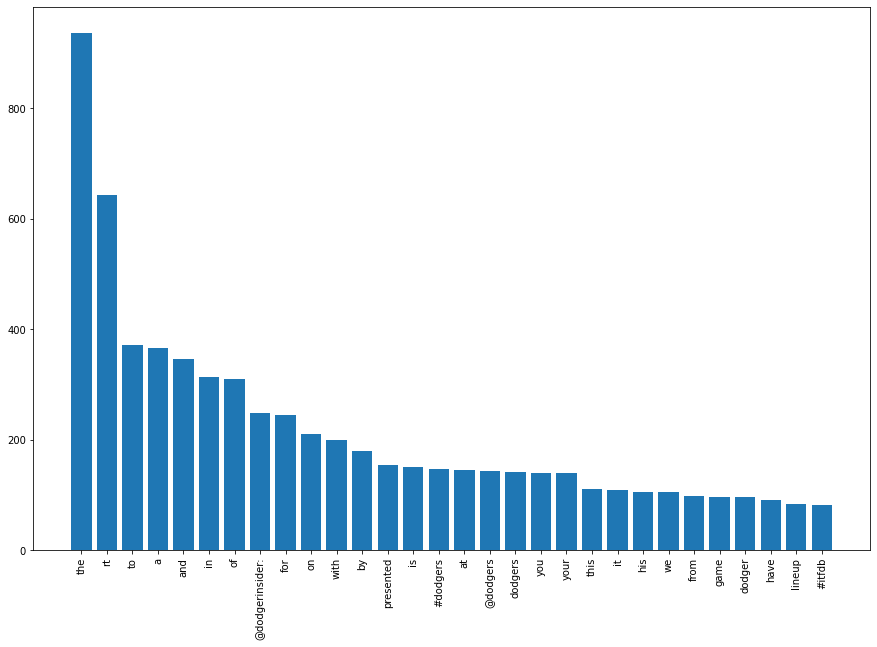

In [ ]:
fig = plt.figure(figsize = (15, 10)) 
plt.bar(dict1.keys(), dict1.values())
plt.xticks(rotation=90)

## Bonus - (5 pts) 

You may see a number of very common words as the most common, e.g., the, in, to, of, etc. You may want to remove those common words, these are typically referred to as "stop words" in the text analysis communities.

The python package `nltk` is used for text analysis. It provides a list of "stop words". Re-analyze the tweet text by removing stop words from consideration, and plot the 30 most popular words with their frequencies.

In [ ]:
import nltk

In [ ]:
#downloaing packages to fiter the words
nltk.download('stopwords')
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
Filtered=[]
stopWords = set(stopwords.words('english'))
for w in range(0,len(l2)):
    if l2[w][0] not in stopWords:#filtering the words
        Filtered.append(l2[w])
        
print(Filtered)

[('rt', 643), ('@dodgerinsider:', 248), ('presented', 155), ('#dodgers', 147), ('@dodgers', 144), ('dodgers', 142), ('game', 97), ('dodger', 96), ('lineup', 83), ('#itfdb', 82), ("tonight's", 82), ('|', 71), ('player', 59), ('@uclahealth.', 59), ('us', 57), ('game,', 54), ('1', 54), ("who's", 53), ('get', 52), ('@sportsnetla:', 50), ('vs.', 49), ('#dodgerszoomparty', 45), ('@sanmanuelcasino?', 43), ('#latogether', 42), ('first', 42), ('mookie', 41), ('happy', 41), ('one', 40), ('back', 39), ('stadium', 38), ('2', 36), ('day', 36), ('good', 36), ('x', 35), ('rhp', 35), ('@biofreeze', 34), ('@yungjoc650', 34), ('@redturn2', 33), ('#dodgerswin!\n\nfinal:', 33), ('los', 33), ('4', 32), ('win', 32), ('🤝', 31), ('roberts', 31), ('@kikehndez', 31), ('time', 30), ('home', 30), ('go', 30), ('like', 29), ('3', 29), ('victory', 28), ('betts', 28), ('kershaw', 28), ('watch', 27), ('team', 27), ('see', 27), ('@alannarizzo', 27), ('last', 26), ('formation!', 26), ('join', 26), ('best', 25), ('world'

In [ ]:
d = {}
for i,j in Filtered:#making dictionary that will help to plot graph
  d[i] = j

Text(0.5, 1.0, 'Most frequent words')

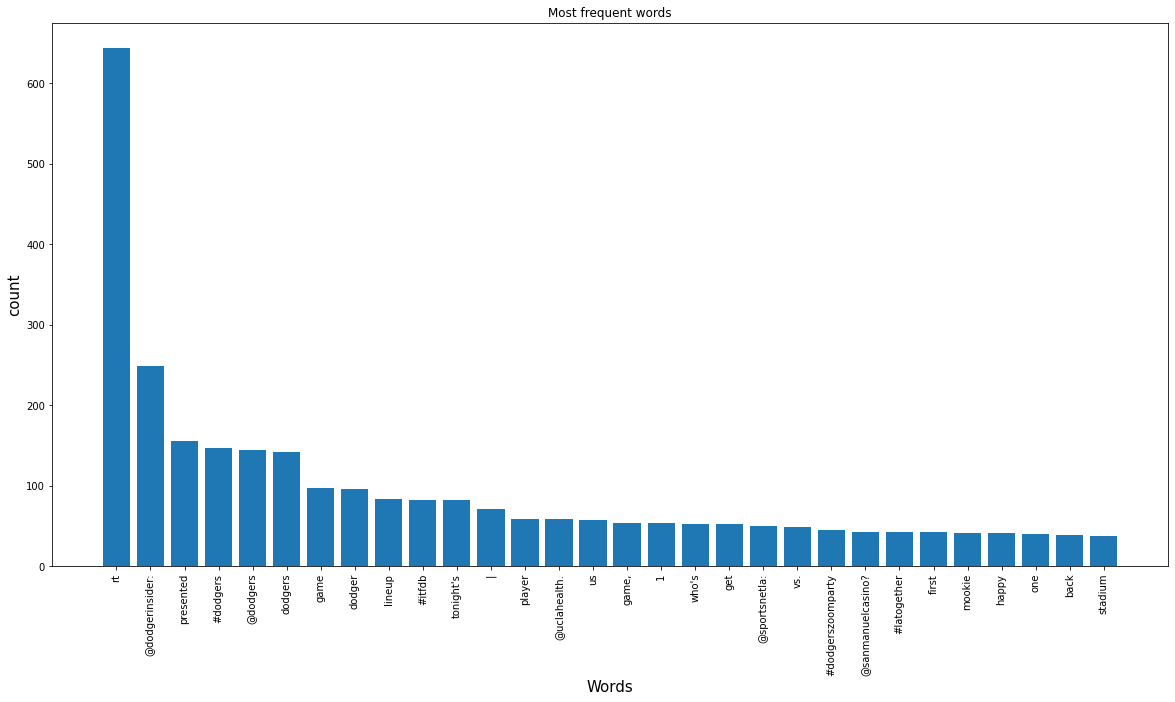

In [ ]:
#plotting the graph
plt.figure(figsize=(20,10))
plt.bar(list(d.keys())[0:30], list(d.values())[0:30])
plt.xlabel('Words', fontsize=15)
plt.ylabel('count', fontsize=15)
plt.xticks(rotation=90) 
plt.title('Most frequent words')


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29],
 <a list of 30 Text major ticklabel objects>)

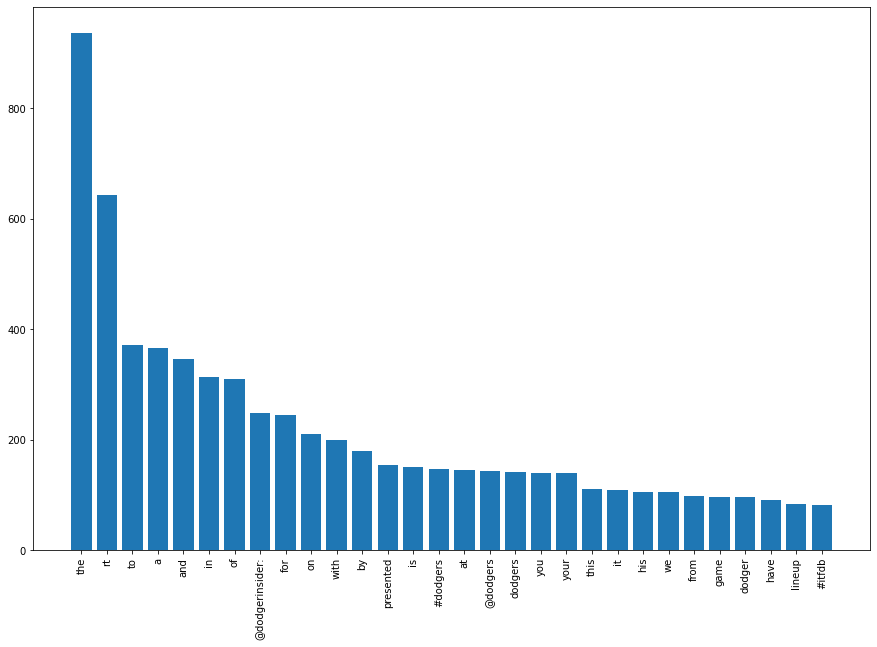

In [ ]:
fig = plt.figure(figsize = (15, 10)) 
plt.bar(dict1.keys(), dict1.values())
plt.xticks(rotation=90)